<a href="https://colab.research.google.com/github/diankaryoko/Image-Classification-Dicoding-Project/blob/main/Dian_Karyoko_Image_Classification_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dian Karyoko, Jakarta Pusat, DKI Jakarta

**Mengimport Library dan Mengecek Versi TensorFlow**

In [ ]:
import pandas as pd
import os
import tarfile
import zipfile
import shutil
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.5.0


**Mengupload dan Mengekstraksi Data Food dari Kaggle**

In [ ]:
! pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"diankaryoko01","key":"1d4c2f5795d248403c803182da4ce3b9"}'}

In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle

kaggle.json


In [ ]:
! kaggle datasets download -d duttadebadri/image-classification

100% 2.34G/2.34G [00:30<00:00, 59.9MB/s]
100% 2.34G/2.34G [00:30<00:00, 82.7MB/s]


In [ ]:
# Unzip File
!mkdir images
!unzip -qq image-classification.zip -d images
!ls images

images	test  validation


In [ ]:
# Memeriksa isi file
os.listdir('images')

['images', 'test', 'validation']

In [ ]:
# Memeriksa isi folder images
os.listdir('images/images/images')

['architecure', 'travel and  adventure', 'art and culture', 'food and d rinks']

In [ ]:
# Memeriksa banyak data : membuat dataframe sebaran banyak data pada train set dan validation set
data = [['Architecture', len(os.listdir('images/images/images/architecure'))],
        ['Art and Culture', len(os.listdir('images/images/images/art and culture'))],
        ['Travel and Adventure', len(os.listdir('images/images/images/travel and  adventure'))],
        ['Food and Drinks', len(os.listdir('images/images/images/food and d rinks'))]
     ]

df = pd.DataFrame(data,columns=['Label', 'Total Data'])
print(df)

                  Label  Total Data
0          Architecture        8763
1       Art and Culture        8750
2  Travel and Adventure        8800
3       Food and Drinks        8782


Kita akan memakai data pada folder images saja, supaya rasio jumlah train set dan validation set bisa dicustom.

**Membuat Train Set dan Validation Set**

In [ ]:
# Membuat train set dan validation set untuk masing-masing label
archi_train, archi_val = train_test_split(os.listdir('images/images/images/architecure'), test_size = 0.2)
art_train, art_val = train_test_split(os.listdir('images/images/images/art and culture'), test_size = 0.2)
travel_train, travel_val = train_test_split(os.listdir('images/images/images/travel and  adventure'), test_size = 0.2)
food_train, food_val = train_test_split(os.listdir('images/images/images/food and d rinks'), test_size = 0.2)

In [ ]:
# Membuat directory baru bernama train dan val
train_dir = os.path.join('images','train')
if not os.path.exists(train_dir):
  os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join('images', 'val')
if not os.path.exists(validation_dir):
  os.makedirs(validation_dir, exist_ok=True)

# Membuat directory baru di dalam directory train dan val
train_archi = os.path.join(train_dir, 'architecture')
if not os.path.exists(train_archi):
  os.mkdir(train_archi)

train_art = os.path.join(train_dir, 'art and culture')
if not os.path.exists(train_art):
  os.mkdir(train_art)

train_travel = os.path.join(train_dir, 'travel and adventure')
if not os.path.exists(train_travel):
  os.mkdir(train_travel)

train_food = os.path.join(train_dir, 'food and drinks')
if not os.path.exists(train_food):
  os.mkdir(train_food)

val_archi = os.path.join(validation_dir, 'architecture')
if not os.path.exists(val_archi):
  os.mkdir(val_archi)

val_art = os.path.join(validation_dir, 'art and culture')
if not os.path.exists(val_art):
  os.mkdir(val_art)

val_travel = os.path.join(validation_dir, 'travel and adventure')
if not os.path.exists(val_travel):
  os.mkdir(val_travel)

val_food = os.path.join(validation_dir, 'food and drinks')
if not os.path.exists(val_food):
  os.mkdir(val_food)

In [ ]:
# Memeriksa directory baru yang telah dibuat
os.listdir('images/train')

['food and drinks', 'art and culture', 'architecture', 'travel and adventure']

In [ ]:
# Memeriksa directory baru yang telah dibuat
os.listdir('images/val')

['food and drinks', 'art and culture', 'architecture', 'travel and adventure']

In [ ]:
# Memindahkan data train dan data val ke directory baru

for i in archi_train:
  shutil.move(os.path.join('images/images/images/architecure', i), os.path.join(train_archi, i))
for i in art_train:
  shutil.move(os.path.join('images/images/images/art and culture', i), os.path.join(train_art, i))
for i in travel_train:
  shutil.move(os.path.join('images/images/images/travel and  adventure', i), os.path.join(train_travel, i))
for i in food_train:
  shutil.move(os.path.join('images/images/images/food and d rinks', i), os.path.join(train_food, i))
for i in archi_val:
  shutil.move(os.path.join('images/images/images/architecure', i), os.path.join(val_archi, i))
for i in art_val:
  shutil.move(os.path.join('images/images/images/art and culture', i), os.path.join(val_art, i))
for i in travel_val:
  shutil.move(os.path.join('images/images/images/travel and  adventure', i), os.path.join(val_travel, i))
for i in food_val:
  shutil.move(os.path.join('images/images/images/food and d rinks', i), os.path.join(val_food, i))


**Augmentasi Gambar**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'images/train',
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
    #karena ini merupakan masalah klasifikasi lebih dari dua kelas, maka class mode yang digunakan adalah categorical
)

validation_generator = test_datagen.flow_from_directory(
    'images/val',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
    #karena ini merupakan masalah klasifikasi lebih dari dua kelas, maka class mode yang digunakan adalah categorical
)

Found 28074 images belonging to 4 classes.
Found 7019 images belonging to 4 classes.


**Membangun Model**

In [ ]:
# Membangun arsitektur CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile model dengan 'adam' optimizer dan loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# Menambahkan callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print('\nAkurasi telat mencapai 92%!')
      self.model.stop_training = True
callbacks = myCallback()

# Melihat ringkasan model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 18, 18, 256)      

In [ ]:
# Melatih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=250,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=150, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks])

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


KeyboardInterrupt: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


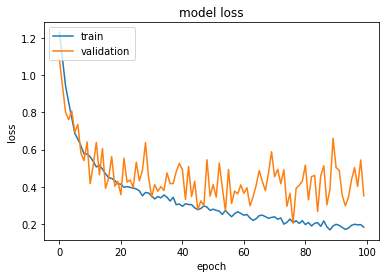

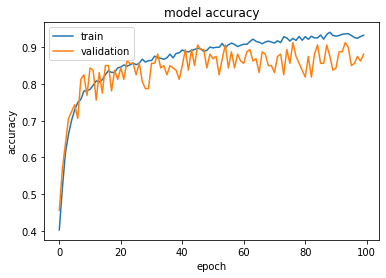

In [ ]:
# Memeriksa semua data di history
print(history.history.keys())

# Visualisasi untuk loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Visualisasi untuk akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Dari plot tersebut, terlihat bahwa grafik untuk train dan validation (baik untuk accuracy ataupun loss function) paralel. Akurasi yang didapatkan juga tinggi, sekitar 0.93. Hal tersebut menandakan model sudah cukup konsisten, tidak overfit (overfit ditandai dengan grafik akurasi train yang tinggi tetapi grafik akurasi validation yang rendah, atau dengan kata lain grafik akurasi train dan validation tidak paralel) dan tidak underfit (karena akurasinya tinggi). Dengan demikian, model sudah bisa dipakai. 

**Menyimpan Model ke Dalam Format TF Lite**

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpa8umk6r8/assets


INFO:tensorflow:Assets written to: /tmp/tmpa8umk6r8/assets


In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.pb') 
%cd

INFO:tensorflow:Assets written to: my_model.pb/assets


INFO:tensorflow:Assets written to: my_model.pb/assets


/root
